In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [6]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['station', 'measurement']

In [7]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [14]:
# Same thing
#last_year = session.query(Measurement.date, Measurement.prcp).\
   # filter(Measurement.date >= '2016-08-23').\
    #order_by(Measurement.date.desc()).all()


('2016-08-23', 0.7)

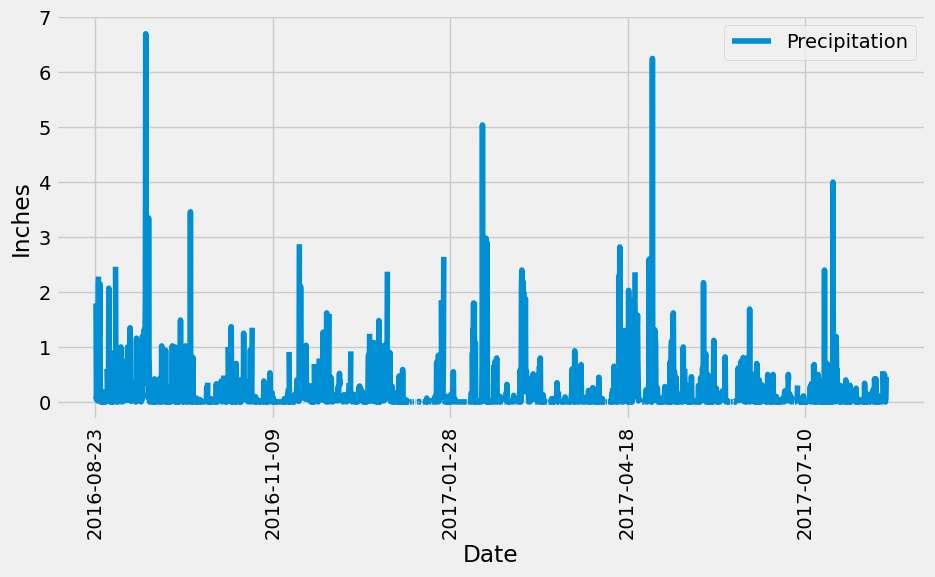

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

start_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores

data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= start_date, Measurement.date <= dt.date(2017, 8, 23)).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date

df = pd.DataFrame(data).set_index('date')
df = df.rename(columns = {'prcp': 'Precipitation'})
df = df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90, xlabel='Date', ylabel='Inches', figsize=(10,5))
plt.show()


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.station).count()

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations = session.query(Measurement.station,func.count(Measurement.station)).\
                group_by(Measurement.station).\
                order_by(func.count(Measurement.station).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active = 'USC00519281'
low_temp = session.query(func.min(Measurement.tobs)).\
                         filter(Measurement.station == active).first()
high_temp = session.query(func.max(Measurement.tobs)).\
                          filter(Measurement.station == active).first()
avg_temp = session.query(func.avg(Measurement.tobs)).\
                         filter(Measurement.station == active).first()
[low_temp, high_temp, avg_temp]

[(54.0,), (85.0,), (71.66378066378067,)]

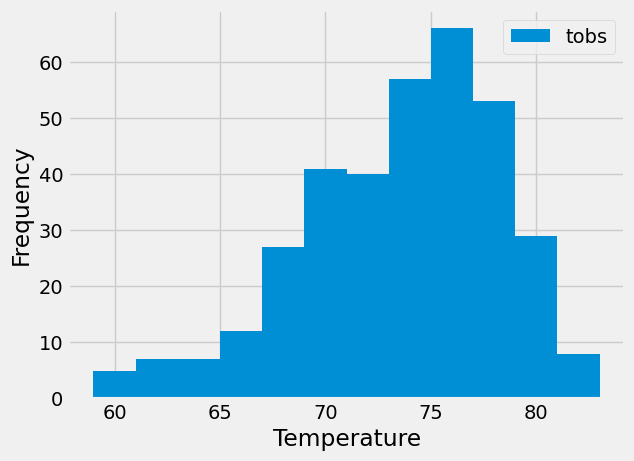

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(Measurement.tobs).\
                filter(Measurement.station == active).\
                filter(Measurement.date >= start_date, Measurement.date <= dt.date(2017, 8, 23)).all()
active_data = pd.DataFrame(temp_data, columns = ['tobs'])
active_data.plot.hist(bins = 12)
plt.xlabel ('Temperature')
plt.show()

# Close Session

In [16]:
# Close Session
session.close()
